# Feature Preparation, Selection and Engineering

## Introduction

In the last mission, we made our first submission to Kaggle, getting an accuracy score of 75.6%. While this is a good start, there is definitely room for improvement. There are two main areas we can focus on to boost the accuracy of our predictions:

* Improving the features we train our model on
* Improving the model itself

In this mission, we're going to focus working with the features used in our model.<br>

We'll start by looking at **feature selection**. Feature selection is important because it helps to exclude features which are not good predictors, or features that are closely related to each other. Both of these will cause our model to be less accurate, particularly on previously unseen data.<br>

The diagram below illustrates this. The red dots represent the data we are trying to predict, and each of the blue lines represents a different model.

![https://s3.amazonaws.com/dq-content/186/overfitting.svg](https://s3.amazonaws.com/dq-content/186/overfitting.svg)

The model on the left is **overfitting**, which means the model represents the training data too closely, and is unlikely to predict well on unseen data, like the holdout data for our Kaggle competition.<br>

The model on the right is **well-fit**. It captures the underlying pattern in the data without the detailed noise found just in the training set. A well fit model is likely to make accurate predictions on previously unseen data. The key to creating a well-fit model is to select the right balance of features, and to create new features to train your model.<br>

In the previous mission, we trained our model using data about the age, sex and class of the passengers on the Titanic. Let's start by using the functions we created in that mission to add the columns we had at the end of the first mission.<br>

Remember that any modifications we make to our training data (`train.csv`) we also have to make to our holdout data (`test.csv`).

* Use the `process_age()` function:
* To convert the `Age` column in `train`, assigning the result to `train`.
* To convert the `Age` column in `holdout`, assigning the result to `holdout`.
* Create a for loop which iterates over the column names `"Age_categories"`, `"Pclass"`, and `"Sex"`. In each iteration:
  * Use the `create_dummies()` function to process the `train` dataframe for the given column, assigning the result to `train`.
  * Use the `create_dummies()` function to process the `holdout` dataframe for the given column, assigning the result to `holdout`.
* Use the `print()` function to display the columns in `train` using `train.columns`.

In [66]:
import pandas as pd

train = pd.read_csv('data/train.csv')
holdout = pd.read_csv('data/test.csv')

def process_age(df):
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [67]:
train = process_age(train)
holdout = process_age(holdout)

for col in ['Age_categories', 'Pclass', 'Sex']:
    
    train = create_dummies(train, col)
    holdout = create_dummies(holdout, col)
    
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male'],
      dtype='object')


## Preparing More Features

Our model in the previous mission was based on three columns from the original data: `Age`, `Sex`, and `Pclass`. As you saw when you printed the column names in the previous screen, there are a number of other columns that we haven't yet used. To make it easier to reference, the output from the previous screen is copied below:

```python
Index(['PassengerId', 'Survived', 'Pclass', 'Name',
       'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Age_categories_Missing',
       'Age_categories_Infant',
       'Age_categories_Child',
       'Age_categories_Teenager',
       'Age_categories_Young Adult',
       'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1',
       'Pclass_2', 'Pclass_3','Sex_female',
       'Sex_male'], dtype='object')
```

The last nine rows of the output are dummy columns we created, but in the first three rows we can see there are a number of features we haven't yet utilized. We can ignore `PassengerId`, since this is just a column Kaggle have added to identify each passenger and calculate scores. We can also ignore `Survived`, as this is what we're predicting, as well as the three columns we've already used.<br>

Here is a list of the remaining columns (with a brief description), followed by 10 randomly selected passengers from and their data from those columns, so we can refamiliarize ourselves with the data.

* `SibSp` - The number of siblings or spouses the passenger had aboard the Titanic
* `Parch` - The number of parents or children the passenger had aboard the Titanic
* `Ticket` - The passenger's ticket number
* `Fare` - The fair the passenger paid
* `Cabin` - The passengers cabin number
* `Embarked` - The port where the passenger embarked (*C=Cherbourg, Q=Queenstown, S=Southampton*)

In [68]:
train[['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].head()

,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,C
2,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,S
4,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,S


At first glance, both the `Name` and `Ticket` columns look to be unique to each passenger. We will come back to these columns later, but for now we'll focus on the other columns.<br>

We can use the [`Dataframe.describe()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) to give us some more information on the values within each remaining column.

```python
>>> columns = ['SibSp','Parch','Fare','Cabin','Embarked']
>>> train[columns].describe(include='all',percentiles=[])
                 SibSp       Parch        Fare Cabin Embarked
    count   891.000000  891.000000  891.000000   204      889
    unique         NaN         NaN         NaN   147        3
    top            NaN         NaN         NaN    G6        S
    freq           NaN         NaN         NaN     4      644
    mean      0.523008    0.381594   32.204208   NaN      NaN
    std       1.102743    0.806057   49.693429   NaN      NaN
    min       0.000000    0.000000    0.000000   NaN      NaN
    50%       0.000000    0.000000   14.454200   NaN      NaN
    max       8.000000    6.000000  512.329200   NaN      NaN
```

Of these, `SibSp`, `Parch` and `Fare` look to be standard numeric columns with no missing values. `Cabin` has values for only 204 of the 891 rows, and even then most of the values are unique, so for now we will leave this column also. `Embarked` looks to be a standard categorical column with 3 unique values, much like `PClass` was, except that there are two missing values. We can easily fill these two missing values with the most common value, "S" which occurs 644 times.<br>

Looking at our numeric columns, we can see a big difference between the range of each. `SibSp` has values between 0-8, `Parch` between 0-6, and `Fare` is on a dramatically different scale, with values ranging from 0-512. In order to make sure these values are equally weighted within our model, we'll need to **rescale** the data.<br>

Rescaling simply stretches or shrinks the data as needed to be on the same scale, in our case between 0 and 1.

![https://s3.amazonaws.com/dq-content/186/rescaling.svg](https://s3.amazonaws.com/dq-content/186/rescaling.svg)

In the diagram above, the three columns have different minimum and maximum values before rescaling.<br>

After rescaling, the values in each feature has been compressed or stretched so that they are all on the same scale - they have the same minimum and maximum, and the relationship between each point is still the same relative other points in that feature. You can now easily see that the data represented in each column is identical.<br>

Within scikit-learn, the [`preprocessing.minmax_scale()` function](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html) allows us to quickly and easily rescale our data:

```python
from sklearn.preprocessing import minmax_scale
columns = ["column one", "column two"]
data[columns] = min_max_scale(data[columns])
```

Let's process the `Embarked`, `SibSp`, `Parch` and `Fare` columns in both our `train` and `holdout` dataframes.

* For both the `train` and `holdout` dataframes:
  * Use the [`Series.fillna()` method](https://www.dataquest.io/m/186/feature-preparation%2C-selection-and-engineering/2/pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.fillna.html) to replace any missing values in the `Embarked` column with `"S"`
  * Use our `create_dummies()` function to create dummy columns for the `Embarked` column.
  * Use `minmax_scale()` to rescale the `SibSp`, `Parch`, and `Fare` columns, assigning the results back to new columns `SibSp_scaled`, `Parch_scaled`. and `Fare_scaled` respectively.

In [69]:
from sklearn.preprocessing import minmax_scale
# The holdout set has a missing value in the Fare column which
# we'll fill with the mean.
holdout["Fare"] = holdout["Fare"].fillna(train["Fare"].mean())

In [70]:
train['Embarked'] = train['Embarked'].fillna("S")
holdout['Embarked'] = holdout['Embarked'].fillna("S")

train = create_dummies(train, 'Embarked')
holdout = create_dummies(holdout, 'Embarked')

for df in [train, holdout]:
    for newcol, toscale in zip(['SibSp_scaled', 'Parch_scaled', 'Fare_scaled'],
                               ['SibSp', 'Parch', 'Fare']):
        df[newcol] = minmax_scale(df[toscale])

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


## Determining the Most Relevant Features

In order to select the best-performing features, we need a way to measure which of our features are relevant to our outcome - in this case, the survival of each passenger. One effective way is by training a logistic regression model using all of our features, and then looking at the coefficients of each feature.<br>

The scikit-learn [LogisticRegression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) has an attribute in which coefficients are stored after the model is fit, `LogisticRegression.coef_`. We first need to train our model, after which we can access this attribute.

```python
lr = LogisticRegression()
lr.fit(train_X,train_y)
coefficients = lr.coef_
```

The `coef()` method returns a NumPy array of coefficients, in the same order as the features that were used to fit the model. To make these easier to interpret, we can convert the coefficients to a pandas series, adding the column names as the index:

```python
feature_importance = pd.Series(coefficients[0],
                               index=train_X.columns)
```

We'll now fit a model and plot the coefficients for each feature.

* Instantiate a `LogisticRegression()` object.
* Fit the `LogisticRegression` object using the `columns` from the list columns from the `train` dataframe and the `target` column `Survived`.
* Use the `coef_` attribute to retrieve the coefficients of the features, and assign the results to `coefficients`.
* Create a series object using `coefficients`, with the feature column names as the index and assign it to `feature_importance`.
* Use the [`Series.plot.barh()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.barh.html) to plot the `feature_importance` series.

In [71]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled']

In [72]:
lr = LogisticRegression()
lr.fit(train[columns], train['Survived'])
coefficients = lr.coef_
coefficients

array([[-0.34723567,  1.86060592,  0.34493188, -0.18273418, -0.0110893 ,
        -0.52620202, -0.90049959,  1.04515623,  0.13729476, -0.94467395,
         1.45610934, -1.2183323 ,  0.25010253,  0.24374319, -0.25606868,
        -1.74775712, -0.77650208,  0.54308487]])

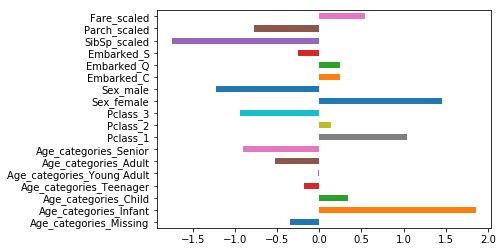

In [73]:
feature_importance = pd.Series(coefficients[0], index=columns)
feature_importance.plot.barh()
plt.show()

## Training a model using relevant features

The plot we generated in the last screen showed a range of both positive and negative values. Whether the value is positive or negative isn't as important in this case, relative to the magnitude of the value. If you think about it, this makes sense. A feature that indicates strongly whether a passenger died is just as useful as a feature that indicates strongly that a passenger survived, given they are mutually exclusive outcomes.<br>

To make things easier to interpret, we'll alter the plot to show all positive values, and have sorted the bars in order of size:

```python
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()
```

![https://s3.amazonaws.com/dq-content/186/feature_importance.png](https://s3.amazonaws.com/dq-content/186/feature_importance.png)

We'll train a new model with the top 8 scores and check our accuracy using cross validation.

* Instantiate a `LogisticRegression()` object.
* Use the [`model_selection.cross_val_score()` function](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) and assign the returned object to `scores`, using:
  * The columns specified in `columns` and all rows from the `train` dataframe.
  * A `cv` parameter of 10.
* Calculate the mean of the cross validation scores and assign the results to `accuracy`.
* Use the `print()` function to display the variable `accuracy`.

In [74]:
from sklearn.model_selection import cross_val_score

columns = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 
           'Sex_male', 'Pclass_1', 'Pclass_3', 
           'Age_categories_Senior', 'Parch_scaled']

In [75]:
lr = LogisticRegression()
scores = cross_val_score(lr, train[columns], train['Survived'], cv=10)
accuracy = scores.mean()

print(accuracy)

0.814801952105


## Submitting our Improved Model to Kaggle

The cross validation score of 81.48% is marginally higher than the cross validation score for the model we created in the previous mission, which had a score of 80.2%.<br>

Hopefully, this improvement will translate to previously unseen data. Let's train a model using the columns from the previous step, make some predictions on the holdout data and submit it to Kaggle for scoring.

* Instantiate a `LogisticRegression()` object and fit it using `all_X` and `all_y`.
* Use the `predict()` method to make predictions using the same columns in the `holdout` dataframe, and assign the result to `holdout_predictions`
* Create a dataframe `submission` with two columns:
  * `PassengerId`, with the values from the `PassengerId` column of the `holdout` dataframe.
  * `Survived`, with the values from `holdout_predictions`.
* Use the `DataFrame.to_csv` method to save the `submission` dataframe to the filename `submission_1.csv`.

In [76]:
columns = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_3', 'Age_categories_Senior', 'Parch_scaled']

all_X = train[columns]
all_y = train['Survived']

In [77]:
lr = LogisticRegression()
lr.fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[columns])

submission_df = {'PassengerId':holdout['PassengerId'],
                'Survived':holdout_predictions}

pd.DataFrame(submission_df).to_csv('submission_1.csv',
                                  index=False)

## Engineering a New Feature Using Binning

You can download the CSV from the previous step [here](https://s3.amazonaws.com/dq-content/186/submission_1.csv). When you submit it to Kaggle, you'll see that the store is 77.0%, which at the time of writing equates to jumping about 1,500 places up the leaderboard (this will vary as the leaderboard is always changing). It's only a small improvement, but we're moving in the right direction.<br>

A lot of the gains in accuracy in machine learning come from **Feature Engineering**. Feature engineering is the practice of creating new features from your existing data.<br>

### One common way to engineer a feature is using a technique called binning. 
Binning is when you take a continuous feature, like the fare a passenger paid for their ticket, and separate it out into several ranges (or 'bins'), **turning it into a categorical variable**.

This can be useful when there are patterns in the data that are non-linear and you're using a linear model (like logistic regression). We actually used binning in the previous mission when we dealt with the `Age` column, although we didn't use the term.<br>

Let's look at histograms of the `Fare` column for passengers who died and survived, and see if there are patterns that we can use when creating our bins.

![https://s3.amazonaws.com/dq-content/186/fare_histogram.png](https://s3.amazonaws.com/dq-content/186/fare_histogram.png)

Looking at the values, it looks like we can separate the feature into four bins to capture some patterns from the data:

* 0-12
* 12-50
* 50-100
* 100+

Like in the previous mission, we can use the [`pandas.cut()` function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) to create our bins.

* Using the `process_age()` function as a model, create a function `process_fare()` that uses the pandas `cut()` method to create bins for the `Fare` column and assign the results to a new column called `Fare_categories`.
  * We have already dealt with missing values in the `Fare` column, so you won't need the line that uses `fillna()`.
* Use the `process_fare()` function on both the `train` and `holdout` dataframes, creating the four 'bins':
  * `0-12`, for values between 0 and 12.
  * `12-50`, for values between 12 and 50.
  * `50-100`, for values between 50 and 100.
  * `100+`, for values between 100 and 1000.
* Use the `create_dummies()` function on both the train and holdout dataframes to create dummy columns for the Fare column.

In [78]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

In [79]:
def process_fare(df, cut_points, label_names):
    df["Fare"] = df["Fare"].fillna(-0.5)
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

In [80]:
cut_pts = [0, 12, 50, 100, 1000]
labels = ['0-12', '12-50', '50-100', '100+']

for df in [train, holdout]:
    df = process_fare(df, cut_pts, labels)

In [81]:
train = create_dummies(train, 'Fare_categories')
holdout = create_dummies(holdout, 'Fare_categories')

## Engineering Features From Text Columns

Another way to engineer features is by extracting data from text columns. Earlier, we decided that the `Name` and `Cabin` columns weren't useful by themselves, but what if there is some data there we could extract? Let's take a look at a random sample of rows from those two columns:

In [82]:
import numpy as np

In [83]:
train[['Name', 'Cabin']].iloc[np.random.choice(train.index, 5)]

,Name,Cabin
9,"Nasser, Mrs. Nicholas (Adele Achem)",NaN
678,"Goodwin, Mrs. Frederick (Augusta Tyler)",NaN
450,"West, Mr. Edwy Arthur",NaN
251,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",G6
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",D35


While in isolation the cabin number of each passenger will be reasonably unique to each, we can see that the format of the cabin numbers is one letter followed by two numbers. It seems like the letter is representative of the type of cabin, which could be useful data for us. We can use the pandas [`Series.str` accessor](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.html) and then subset the first character using brackets:

```python
>>> train.head()["Cabin"]
    0     NaN
    1     C85
    2     NaN
    3    C123
    4     NaN
    Name: Cabin, dtype: object
>>> train.head()["Cabin"].str[0]
    0    NaN
    1      C
    2    NaN
    3      C
    4    NaN
    Name: Cabin, dtype: object
```

Looking at the Name column, There is a title like `'Mr'` or `'Mrs'` within each, as well as some less common titles, like the `'Countess'` from the final row of our table above. By spending some time researching the different titles, we can categorize these into six types:

* Mr
* Mrs
* Master
* Miss
* Officer
* Royalty

We can use the `Series.str.extract` method and a **regular expression** to extract the title from each name and then use the `Series.map()` method and a predefined dictionary to simplify the titles.

```python
titles = {
    "Mme":         "Mrs",
    "Ms":          "Mrs",
    "Mrs" :        "Mrs",
    "Countess":    "Royalty",
    "Lady" :       "Royalty"
}
extracted_titles = train["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
train["Title"] = extracted_titles.map(titles)
```

* Use `extract()`, `map()` and the dictionary `titles` to categorize the titles for the holdout dataframe and assign the results to a new column `Title`.
* For both the `train` and `holdout` dataframes:
  * Use the `str()` accessor to extract the first letter from the `Cabin` column and assign the result to a new column `Cabin_type`.
  * Use the `fillna()` method to fill any missing values in `Cabin_type` with `"Unknown"`
* For the newly created columns `Title` and `Cabin_type`, use `create_dummies()` to create dummy columns for both the `train` and `holdout` dataframes.

In [84]:
titles = {
    "Mr" :         "Mr",
    "Mme":         "Mrs",
    "Ms":          "Mrs",
    "Mrs" :        "Mrs",
    "Master" :     "Master",
    "Mlle":        "Miss",
    "Miss" :       "Miss",
    "Capt":        "Officer",
    "Col":         "Officer",
    "Major":       "Officer",
    "Dr":          "Officer",
    "Rev":         "Officer",
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",
    "Countess":    "Royalty",
    "Dona":        "Royalty",
    "Lady" :       "Royalty"
}

extracted_titles = train["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
train["Title"] = extracted_titles.map(titles)

In [85]:
extracted_titles = holdout['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
holdout["Title"] = extracted_titles.map(titles)

In [86]:
for df in [train, holdout]:
    
    df['Cabin_type'] = df['Cabin'].str.extract('([A-Za-z]){1}',expand=False)
    df['Cabin_type'] = df['Cabin_type'].fillna('Unknown')

In [87]:
train = create_dummies(train, 'Cabin_type')
holdout = create_dummies(holdout, 'Cabin_type')

In [88]:
train = create_dummies(train, 'Title')
holdout = create_dummies(holdout, 'Title')

## Finding Correlated Features

We now have 34 possible feature columns we can use to train our model. One thing to be aware of as you start to add more features is a concept called **collinearity**. Collinearity occurs where more than one feature contains data that are similar.<br>

The effect of collinearity is that your model will overfit - you may get great results on your test data set, but then the model performs worse on unseen data (like the holdout set).<br>

One easy way to understand collinearity is with a simple binary variable like the `Sex` column in our dataset. Every passenger in our data is categorized as either male or female, so 'not male' is exactly the same as 'female'.<br>

As a result, when we created our two dummy columns from the categorical `Sex` column, we've actually created two columns with identical data in them. This will happen whenever we create dummy columns, and is called the [dummy variable trap](http://www.algosome.com/articles/dummy-variable-trap-regression.html). The easy solution is to choose one column to drop any time you make dummy columns.<br>

Collinearity can happen in other places, too. A common way to spot collinearity is to plot correlations between each pair of variables in a heatmap. An example of this style of plot is below:

![https://s3.amazonaws.com/dq-content/186/corr_heatmap.png](https://s3.amazonaws.com/dq-content/186/corr_heatmap.png)

The darker squares, whether the darker red or darker blue, indicate pairs of columns that have higher correlation and may lead to collinearity. The easiest way to produce this plot is using the `DataFrame.corr()` method to produce a correlation matrix, and then use the Seaborn library's `seaborn.heatmap()` function to plot the values:

```python
import seaborn as sns
correlations = train.corr()
sns.heatmap(correlations)
plt.show()
```

The example plot above was produced using a [code example from seaborn's documentation](http://seaborn.pydata.org/examples/many_pairwise_correlations.html) which produces an correlation heatmap that is easier to interpret than the default output of `heatmap()`. We've created a function containing that code to make it easier for you to plot the correlations between the features in our data.

* Use the `plot_correlation_heatmap()` function to produce a heatmap for the train dataframe, using only the features in the list columns.

In [98]:
import numpy as np
import seaborn as sns

def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_categories_0-12',
       'Fare_categories_12-50','Fare_categories_50-100', 'Fare_categories_100+',
       'Title_Master', 'Title_Miss', 'Title_Mr','Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Cabin_type_A','Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E','Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T', 'Cabin_type_Unknown']

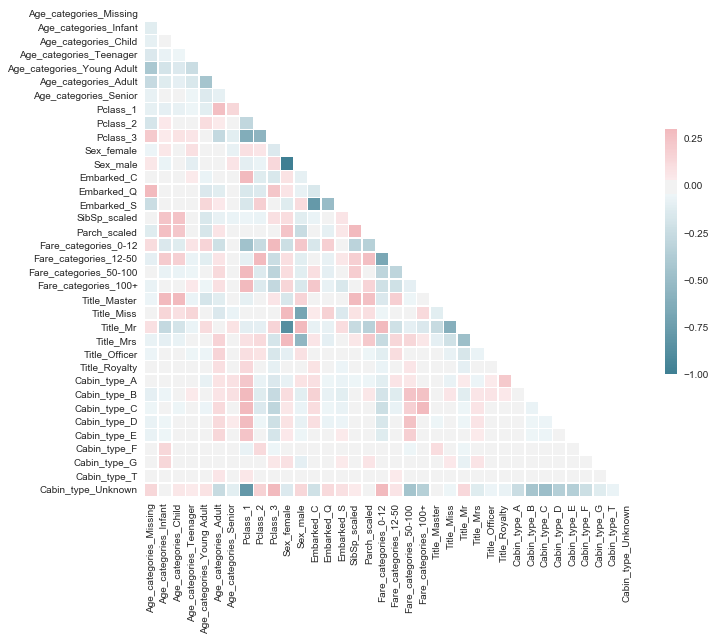

In [99]:
plot_correlation_heatmap(train[columns])

## Final Feature Selection using RFECV

The plot we created in the previous screen is reproduced below:

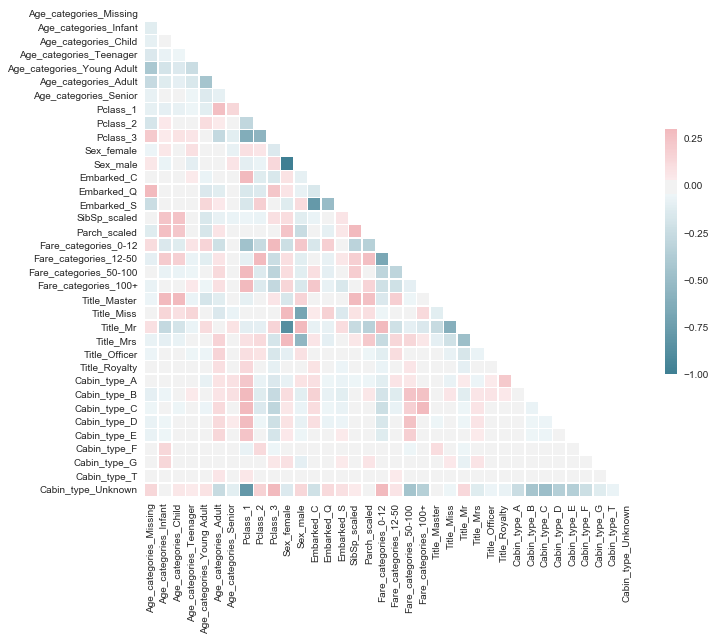

In [100]:
plot_correlation_heatmap(train[columns])

We can see that there is a high correlation between `Sex_female`/`Sex_male` and `Title_Miss`/`Title_Mr`/`Title_Mrs`. We will remove the columns `Sex_female` and `Sex_male` **since the title data may be more nuanced**.<br>

Apart from that, we should remove one of each of our dummy variables to reduce the collinearity in each. We'll remove:

* `Pclass_2`
* `Age_categories_Teenager`
* `Fare_categories_12-50`
* `Title_Master`
* `Cabin_type_A`

In an earlier step, **we manually used the logit coefficients to select the most relevant features**. An alternate method is to use one of scikit-learn's inbuilt `feature selection classes`. We will be using the [`feature_selection.RFECV` class](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html) which performs **recursive feature elimination with cross-validation**.<br>

The `RFECV` class starts by training a model using all of your features and scores it using cross validation. It then uses the logit coefficients to eliminate the least important feature, and trains and scores a new model. At the end, the class looks at all the scores, and selects the set of features which scored highest.<br>

Like the `LogisticRegression` class, `RFECV` must first be instantiated and then fit. The first parameter when creating the RFECV object must be an estimator, and we need to use the cv parameter to specific the number of folds for cross-validation.

```python
from sklearn.feature_selection import RFECV
lr = LogisticRegression()
selector = RFECV(lr,cv=10)
selector.fit(all_X,all_y)
```

Once the `RFECV` object has been fit, we can use the `RFECV.support_ attribute` to access a boolean mask of True and False values which we can use to generate a list of optimized columns:

```python
optimized_columns = all_X.columns[selector.support_]
```

* Instantiate a `LogisticRegression()` object, `lr`.
* Instantiate a `RFECV()` object selector using the newly created `lr` object and `cv=10` as parameters.
* Use the `fit()` method to fit selector using `all_X` and `all_y`
* Use the `support_` attribute selector to subset `all_X.columns`, and assign the result to `optimized_columns`.

In [101]:
from sklearn.feature_selection import RFECV

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Pclass_1', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
       'Parch_scaled', 'Fare_categories_0-12', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty', 'Cabin_type_B', 'Cabin_type_C',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
       'Cabin_type_T', 'Cabin_type_Unknown']

all_X = train[columns]
all_y = train["Survived"]

In [102]:
lr = LogisticRegression()
selector = RFECV(lr, cv=10)
selector.fit(all_X, all_y)

RFECV(cv=10,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [106]:
optimized_columns = all_X.columns[selector.support_]

In [107]:
print(optimized_columns)

Index(['SibSp_scaled', 'Title_Mr', 'Title_Officer', 'Cabin_type_Unknown'], dtype='object')


## Training A Model Using our Optimized Columns

The `RFECV()` selector returned only four columns:

```python
['SibSp_scaled', 'Title_Mr', 'Title_Officer', 'Cabin_type_Unknown']
```

Let's train a model using **cross validation** using these columns and check the score.

In [108]:
all_X = train[optimized_columns]
all_y = train["Survived"]

* Instantiate `LogisticRegression()` object.
* Use the `model_selection.cross_val_score()` function and assign the results to scores, using:
  * `all_X` and `all_y`.
  * A `cv` parameter of `10`.
* Calculate the mean of the cross validation scores and assign the results to `accuracy`.

In [109]:
lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = scores.mean()

accuracy

0.82265491998638074

## Submitting our Model to Kaggle

This four-feature model scores `82.3%`, a modest improvement compared to the `81.5%` from our earlier model. Let's train these columns on the holdout set, save a submission file and see what score we get from Kaggle.

* Instantiate a `LogisticRegression()` object and fit it using all_X and all_y.
* Use the `predict()` method to make predictions using the same columns in the `holdout` dataframe, and assign the result to `holdout_predictions`.
* Create a dataframe submission with two columns:
  * `PassengerId`, with the values from the `PassengerId` column of the `holdout` dataframe.
  * `Survived`, with the values from `holdout_predictions`.
* Use the `DataFrame.to_csv` method to save the submission dataframe to the filename `submission_2.csv`.

In [110]:
lr = LogisticRegression()
lr.fit(all_X, all_y)

holdout_predictions = lr.predict(holdout[all_X.columns])

submission_df = {'PassengerId': holdout['PassengerId'],
                'Survived': holdout_predictions}

submission = pd.DataFrame(submission_df)
submission.to_csv('submission_2.csv', index=False)

## Next Steps

You can download the submission file we just created [here](https://s3.amazonaws.com/dq-content/186/submission_2.csv) and submit it to Kaggle. The score this submission gets is 78.0%, which is equivalent to a jump of roughly 1,000 spots (again, this will vary as submission are constantly being made to the leaderboard).

![https://s3.amazonaws.com/dq-content/186/submission_2.png](https://s3.amazonaws.com/dq-content/186/submission_2.png)

By preparing, engineering and selecting features, we have increased our accuracy by 2.4%. When working in Kaggle competitions, you should spend a lot of time experimenting with features, particularly feature engineering.

Here are some ideas that you can use to work with features for this competition:

* Use `SibSp` and `Parch` to explore total relatives onboard.
* Create **combinations of multiple columns**, for instance `Pclass` + `Sex`.
* See if you can extract useful data out of the `Ticket` column.
* Try **different combinations of features** to see if you can identify features that overfit less than others.

In the next mission in this course, we'll look at selecting and optimizing different models to improve our score.